In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 인구/면적/소득 살펴보기

In [78]:
df = pd.read_csv("./data/safety/crime_pop_ratio.csv", encoding="utf-8")

In [79]:
df.head()

,county_name,women_2030,pop_total,sex_crime,not_sex_crime,2030_pop,crime_pop_ratio,crime_pop23_ratio,sex_crime_pop_ratio,sex_crime_women_pop23_ratio,crime_women_pop23_ratio
0,강남구,77955,549154,667,6280,146815,0.011436,0.042775,0.011436,0.080559,0.080559
1,강동구,63912,459389,157,3554,124894,0.007736,0.028456,0.007736,0.055608,0.055608
2,강북구,36353,287490,177,2655,72830,0.009235,0.036455,0.009235,0.073034,0.073034
3,강서구,91473,562528,261,4402,175231,0.007825,0.025121,0.007825,0.048123,0.048123
4,관악구,94240,481872,327,4552,195802,0.009446,0.023248,0.009446,0.048302,0.048302


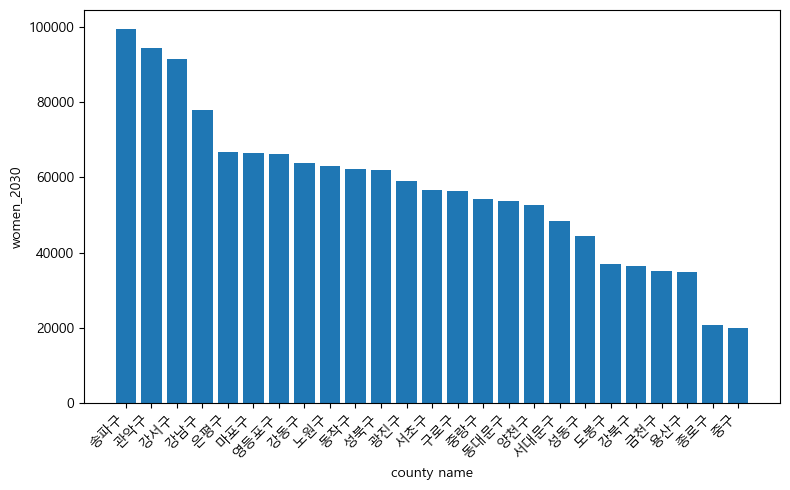

In [51]:
plt.figure(figsize=(8, 5))
plt.bar(sorted_df['county_name'], sorted_df['women_2030'])
plt.xlabel('county name')
plt.ylabel('women_2030')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## 일반 범죄 + 성범죄 인구 별 비율 순위

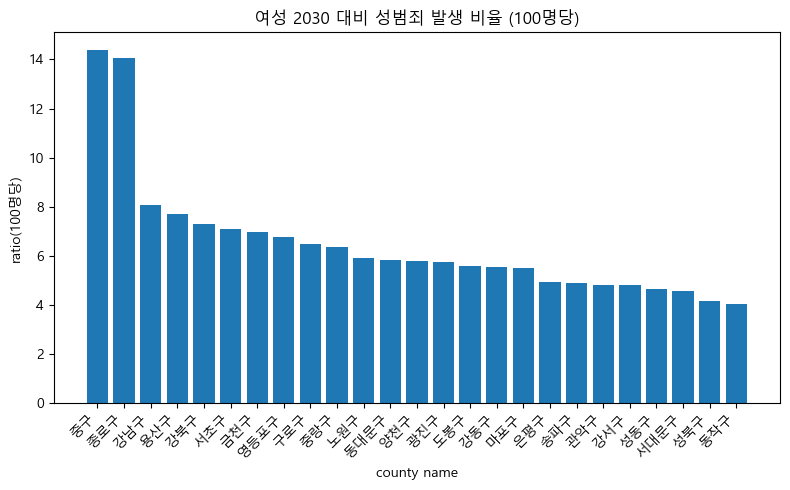

In [367]:
plt.figure(figsize=(8, 5))
plt.bar(df_safe['county_name'], df_safe['sex_crime_women_pop23_ratio'])
plt.title('safe - 1인당 지역내총생산(천원)')
plt.xlabel('county name')
plt.ylabel('ratio(100명당)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## 유흥주점

## 자치구 별 전체 인구 대비 유흥주점 순위

In [83]:
pub = pd.read_csv("./data/safety/club_pub_county.csv")
gdp = pd.read_csv("./data/safety/county_gdp.csv")
pop = pd.read_csv("./data/safety/county_pop_2030.csv")

In [420]:
h1 = pd.read_csv("./data/safety/one_house.csv")
h1_ratio = pd.read_csv("./data/safety/county_pop_h1_ratio.csv")
h1.head()

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
0,강남구,77955,20051,2.572125,36502,4.682445,73579
1,강동구,63912,12794,2.001815,24157,3.779728,59752
2,강북구,36353,8691,2.390724,16815,4.625478,51134
3,강서구,91474,27507,3.007084,50790,5.552397,100695
4,관악구,94240,45370,4.814304,96439,10.233340,145433


#### 유흥주점 개수로 순위 뽑기

In [84]:
pub.head()

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
0,0,강남구,350,44.897697,1.745549
1,1,강동구,176,27.537865,1.375645
2,2,강북구,146,40.161747,1.679899
3,3,강서구,282,30.828432,1.025194
4,4,관악구,244,25.891341,0.537800


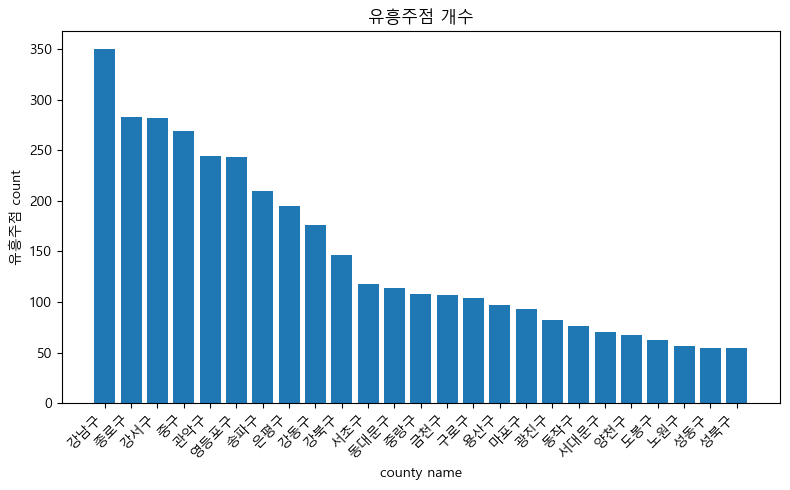

In [521]:
cnt_pub = pub.sort_values(by='club_cnt', ascending=False)
#fig = plt.figure(figsize=(8,5), facecolor='pink')
fig = plt.figure(figsize=(8,5))
plt.bar(cnt_pub['county_name'], cnt_pub['club_cnt'],)
plt.title('유흥주점 개수')
plt.xlabel('county name')
plt.ylabel('유흥주점 count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<Axes: ylabel='club_cnt'>

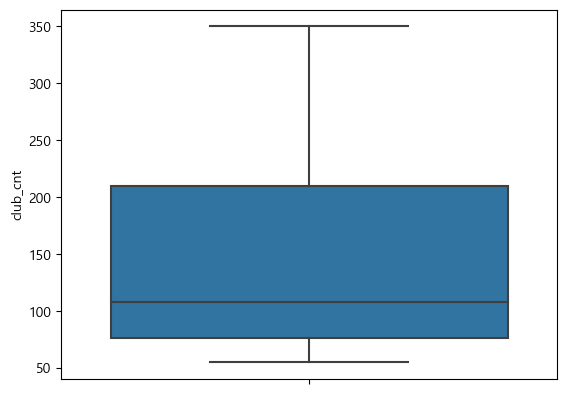

In [381]:
sns.boxplot(data=pub, y='club_cnt')

#### 유흥주점 X 인구, 면적 비율

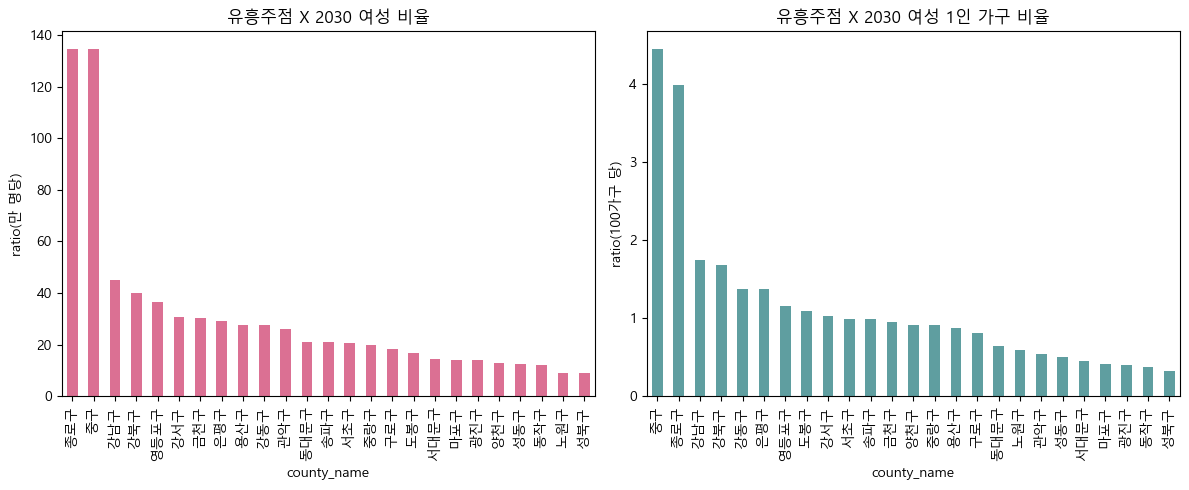

In [85]:
pub_pop = pub.sort_values(by='club_2030women_ratio(만 명당)', ascending=False)
pub_h1 = pub.sort_values(by='club_2030w_h1_ratio(100가구 당)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),)

pub_pop.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('유흥주점 X 2030 여성 비율')
axes[0].set_ylabel('ratio(만 명당)')

pub_h1.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[1], legend=False, color='cadetblue')
axes[1].set_title('유흥주점 X 2030 여성 1인 가구 비율')
axes[1].set_ylabel('ratio(100가구 당)')

#axes.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: ylabel='club_2030w_h1_ratio(100가구 당)'>

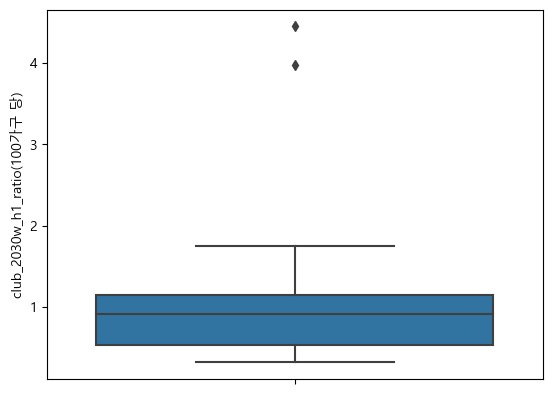

In [424]:
sns.boxplot(data=pub, y='club_2030w_h1_ratio(100가구 당)')

#### Unsafe 동네 X 유흥주점 (2030여성인구)

In [86]:
unsafe = pub_pop[(pub_pop["county_name"] == "강남구") | (pub_pop["county_name"] == "서초구") | (pub_pop["county_name"] == "영등포구")]
unsafe

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
0,0,강남구,350,44.897697,1.745549
19,19,영등포구,243,36.656560,1.150841
14,14,서초구,118,20.824509,0.987696


#### Safe 동네 X 유흥주점 (2030여성인구)

In [87]:
safe = pub_pop[(pub_pop["county_name"] == "도봉구") | (pub_pop["county_name"] == "성동구") | (pub_pop["county_name"] == "성북구")]
safe

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
9,9,도봉구,62,16.748609,1.090014
15,15,성동구,55,12.393528,0.499864
16,16,성북구,55,8.868536,0.320214


#### (not safe vs safe) 유흥주점 X 2030 여성 인구 비율

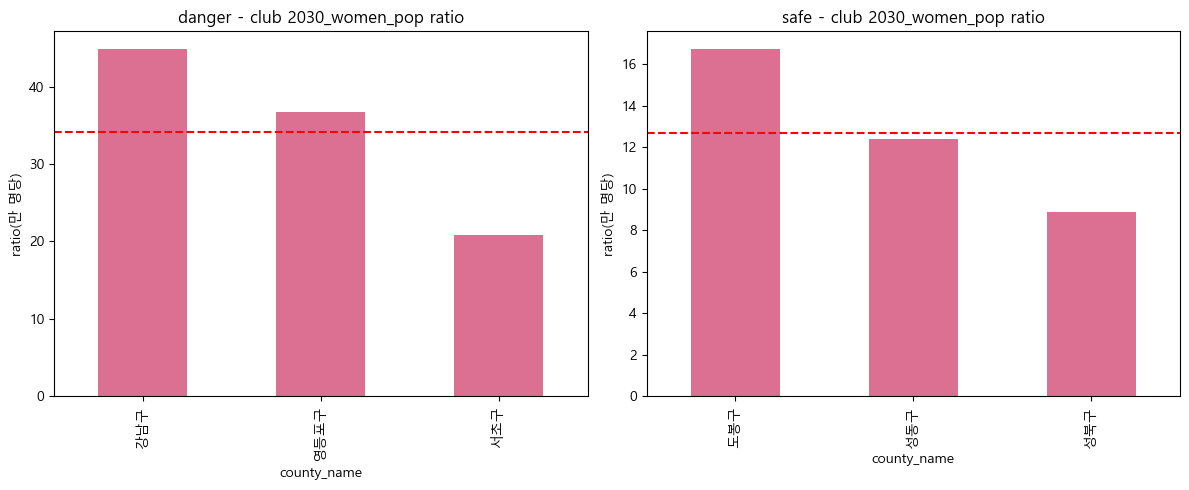

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - club 2030_women_pop ratio')
axes[0].set_ylabel('ratio(만 명당)')

mean_value = unsafe['club_2030women_ratio(만 명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='club_2030women_ratio(만 명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - club 2030_women_pop ratio')
axes[1].set_ylabel('ratio(만 명당)')

mean_value = safe['club_2030women_ratio(만 명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

<Axes: ylabel='club_2030women_ratio(만 명당)'>

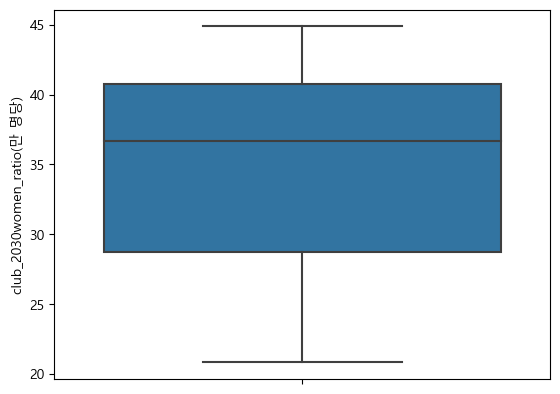

In [432]:
sns.boxplot(data=unsafe, y='club_2030women_ratio(만 명당)')

#### (not safe vs safe) 유흥주점 X 2030 여성 1인 가구 비율

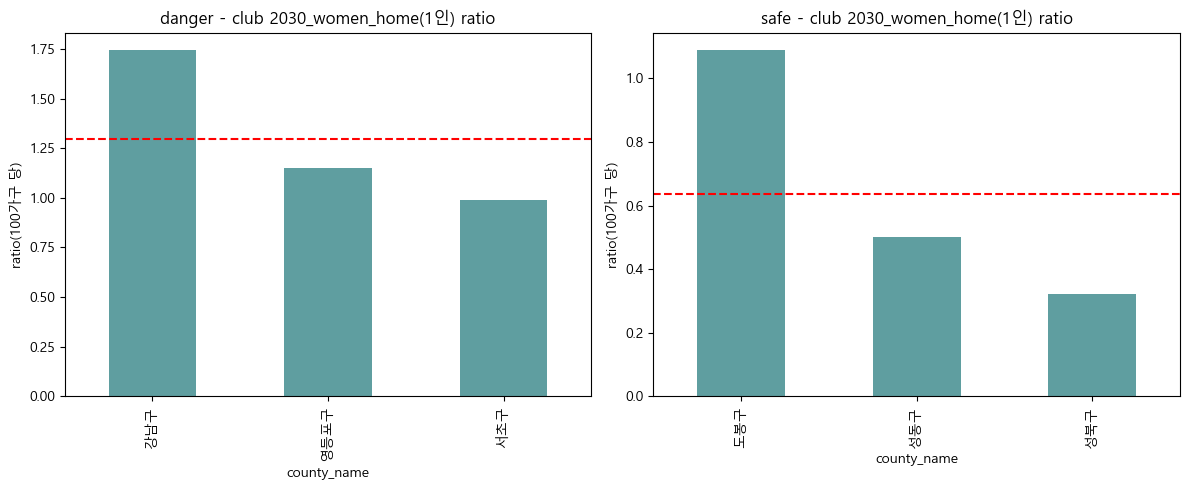

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[0], legend=False, color='cadetblue')
axes[0].set_title('danger - club 2030_women_home(1인) ratio')
axes[0].set_ylabel('ratio(100가구 당)')

mean_value = unsafe['club_2030w_h1_ratio(100가구 당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='club_2030w_h1_ratio(100가구 당)', ax=axes[1], legend=False, color='cadetblue')
axes[1].set_title('safe - club 2030_women_home(1인) ratio')
axes[1].set_ylabel('ratio(100가구 당)')

mean_value = safe['club_2030w_h1_ratio(100가구 당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

### 유흥주점 ttest 진행

#### danger & safe 합치기

In [279]:
unsafe_t = unsafe[["county_name", "club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
#unsafe_t.set_index('county_name', drop=True, inplace=True)
unsafe_t["level"] = "danger"
unsafe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\1752202497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsafe_t["level"] = "danger"


,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
0,강남구,44.897697,1.745549,danger
19,영등포구,36.656560,1.150841,danger
14,서초구,20.824509,0.987696,danger


In [280]:
safe_t = safe[["county_name", "club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
#safe_t.set_index('county_name', drop=True, inplace=True)
safe_t["level"] = "safe"
safe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\221484946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe_t["level"] = "safe"


,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
9,도봉구,16.748609,1.090014,safe
15,성동구,12.393528,0.499864,safe
16,성북구,8.868536,0.320214,safe


In [281]:
ttest = pd.concat([safe_t, unsafe_t], axis=0)

In [282]:
ttest

,county_name,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당),level
9,도봉구,16.748609,1.090014,safe
15,성동구,12.393528,0.499864,safe
16,성북구,8.868536,0.320214,safe
0,강남구,44.897697,1.745549,danger
19,영등포구,36.656560,1.150841,danger
14,서초구,20.824509,0.987696,danger


In [285]:
ttest.groupby("level")[["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]].mean()

,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
level,,
danger,34.126255,1.294695
safe,12.670224,0.636697


#### H0 : danger 지역 평균과 safe 지역 평균에 차이가 없다.
#### H1 : danger 지역 평균과 safe 지역 평균에 차이가 있다.

In [152]:
# 등분산 true 이분산 false

In [286]:
from scipy import stats

test_names = ["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]

danger = ttest[ttest['level'] == 'danger'][["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]
safe = ttest[ttest['level'] == 'safe'][["club_2030women_ratio(만 명당)", "club_2030w_h1_ratio(100가구 당)"]]

for test_name in test_names:
    _, p_value_levene = stats.levene(danger[test_name], safe[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

club_2030women_ratio(만 명당) p-value: 0.3203854353159608, 등분산 가정 만족
club_2030w_h1_ratio(100가구 당) p-value: 0.9880038149179586, 등분산 가정 만족


In [287]:
# 양측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="two-sided",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.04452578 0.11471656]
귀무 가설 기각: [ True False]


In [288]:
# 단측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="less",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.02226289 0.05735828]
귀무 가설 기각: [ True False]


## 인구 (2030 여성) 대비 유흥주점 비율
양측 + 단측 검정 둘 다 귀무가설 기각 (단측이 더 유의미하게 나옴)

-> danger 지역의 평균이 safe 지역의 평균보다 더 높다

-> danger 지역에 유흥주점이 확실히 더 많다.(인구 대비)

## 1인 가구 (2030여성) 대비 유흥주점 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균에는 차이가 없다

-> danger 지역이라고 해서 1인 가구(2030여성) 대비 유흥주점이 더 많은 것은 아니다.

## 유흥주점 많은 곳 범죄 종류 살펴보기

유흥주점 X 2030 여성 비율 높은 지역 top5

종로구 - 중구 - 강남구 - 강북구 - 영등포구

In [9]:
crime = pd.read_csv("./data/safety/county_crime_ratio.csv")
house1 = pd.read_csv("./data/safety/one_house.csv")

In [8]:
crime_club = crime.groupby('county_name').agg({
    'total_crime': 'mean',
    'murder_crime' : 'mean',
    'sex_crime' : 'mean',
    'violence_crime' : 'mean',
    'pop_total': 'sum',
    'women_2030': 'sum', 
    'cctv_num': 'sum',
    'light_num': 'sum',
    'house_num': 'sum',
    'police_num': 'sum',
                      })

KeyError: "Column(s) ['cctv_num', 'house_num', 'light_num', 'police_num'] do not exist"

In [ ]:
crime.head()

In [6]:
crime_club = crime[(crime["county_name"] == "강남구") | (crime["county_name"] == "서초구") | (crime["county_name"] == "영등포구") | (crime["county_name"] == "성북구") | (crime["county_name"] == "성동구") |  (crime["county_name"] == "도봉구")]
crime_club

,county_name,total_crime,murder_crime,sex_crime,violence_crime,h1_w_2030,women_2030,pop_total,sex_crime_23w_ratio,sex_crime_23w_1house_ratio,theft_robbery
0,강남구,6947.0,12.0,667.0,3762.0,20051,13315,78943,0.050094,0.033265,2506.0
9,도봉구,2141.0,3.0,70.0,1099.0,5688,14985,115486,0.004671,0.012307,969.0
14,서초구,4459.0,3.0,431.0,2101.0,11947,365,2320,1.180822,0.036076,1924.0
15,성동구,2194.0,2.0,125.0,1086.0,11003,677,4198,0.184638,0.011361,981.0
16,성북구,2749.0,3.0,158.0,1444.0,17176,828,5594,0.190821,0.009199,1144.0
19,영등포구,4819.0,5.0,327.0,2415.0,21115,840,3697,0.389286,0.015487,2072.0


### 유흥주점 X 인구 대비 top3, bottom 3 - 범죄 발생 건수 비교 

In [5]:
ax = crime_club.plot(kind='bar', x='county_name', y='sex_crime', legend=True, rot=0, figsize=(8, 5))

mean_value = crime_club['sex_crime'].mean()
ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.xlabel('County Name')
plt.ylabel('Sex Crime')
plt.title('Sex Crime by County')

plt.show()

NameError: name 'crime_club' is not defined

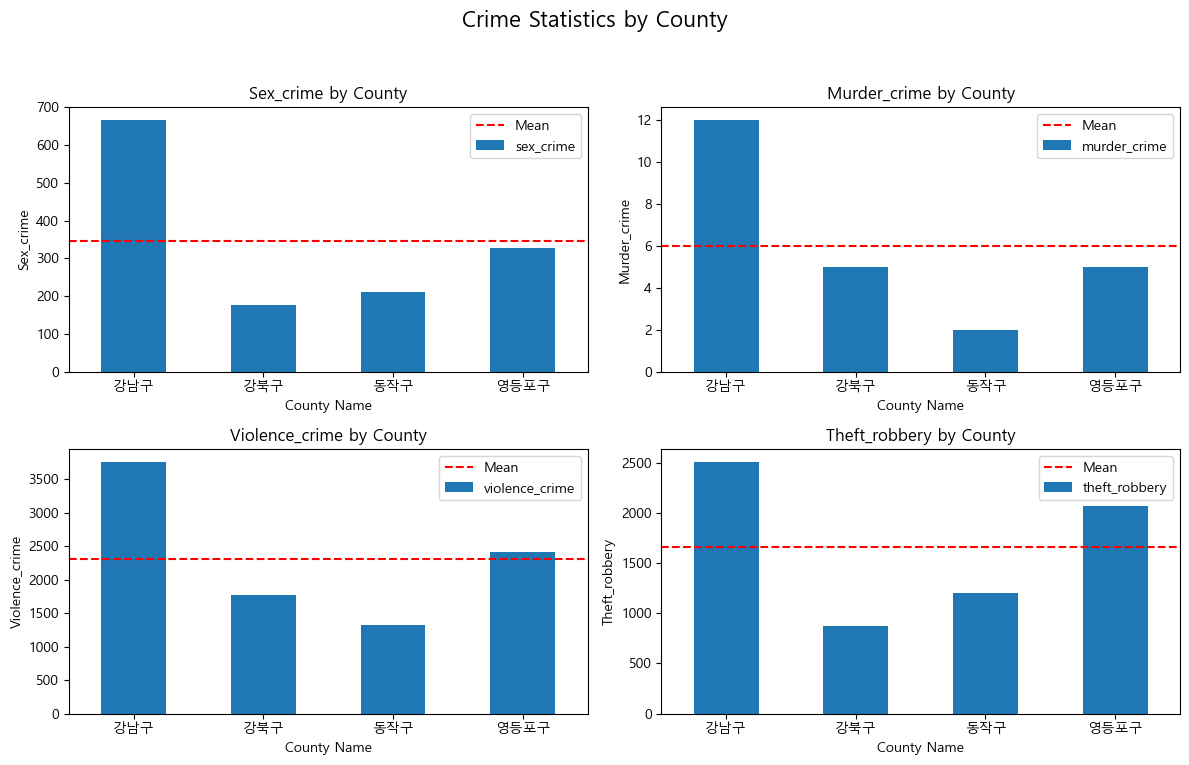

In [53]:
crime_types = ["sex_crime", "murder_crime", "violence_crime", "theft_robbery"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 top3, bottom 3 - 인구 대비 범죄 비율 비교 

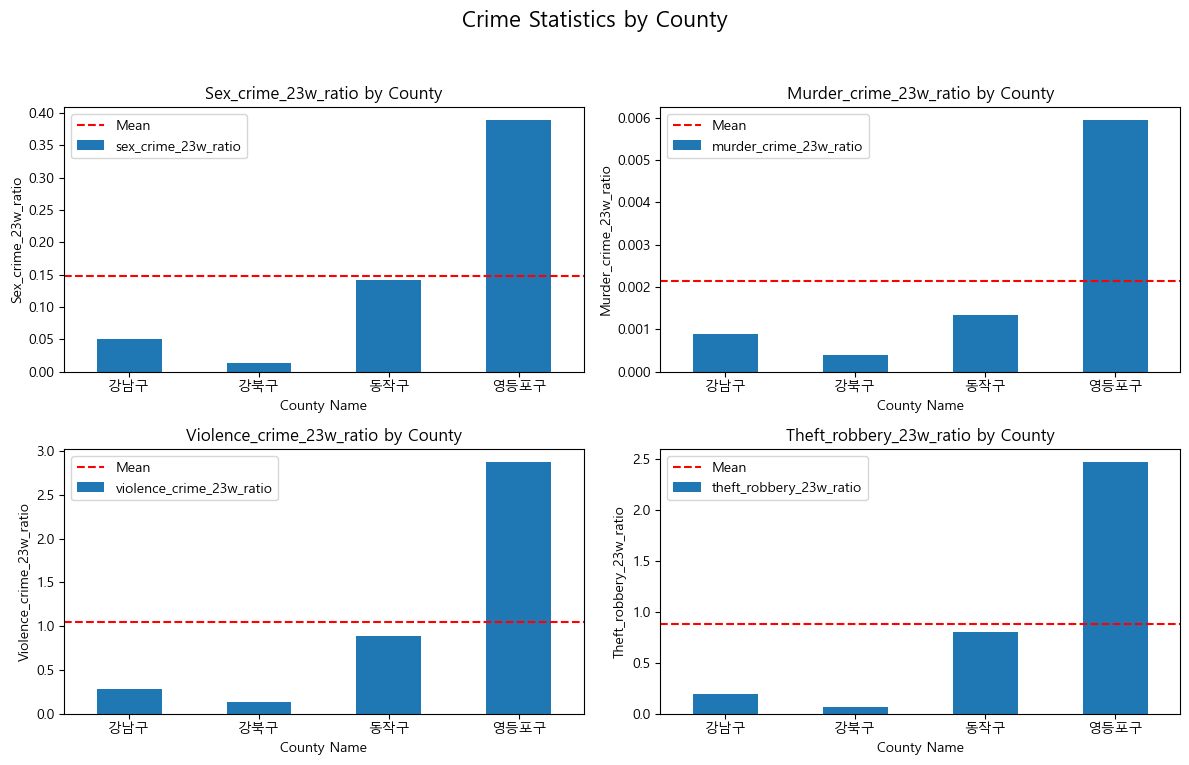

In [109]:
crime_types = ["sex_crime_23w_ratio", "murder_crime_23w_ratio", "violence_crime_23w_ratio", "theft_robbery_23w_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 top3, bottom 3 - 1인가구 대비 범죄 발생 건수 비교 

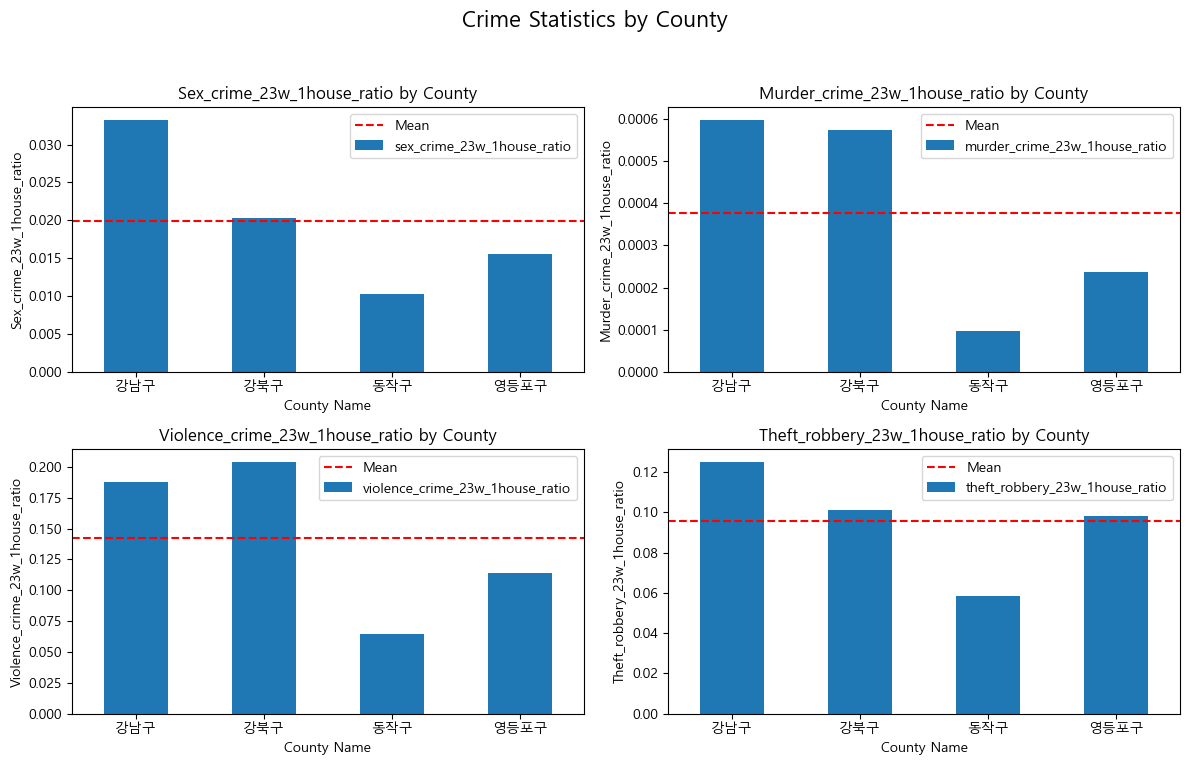

In [55]:
crime_types = ["sex_crime_23w_1house_ratio", "murder_crime_23w_1house_ratio", "violence_crime_23w_1house_ratio", "theft_robbery_23w_1house_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 범죄 발생 건수 비교 

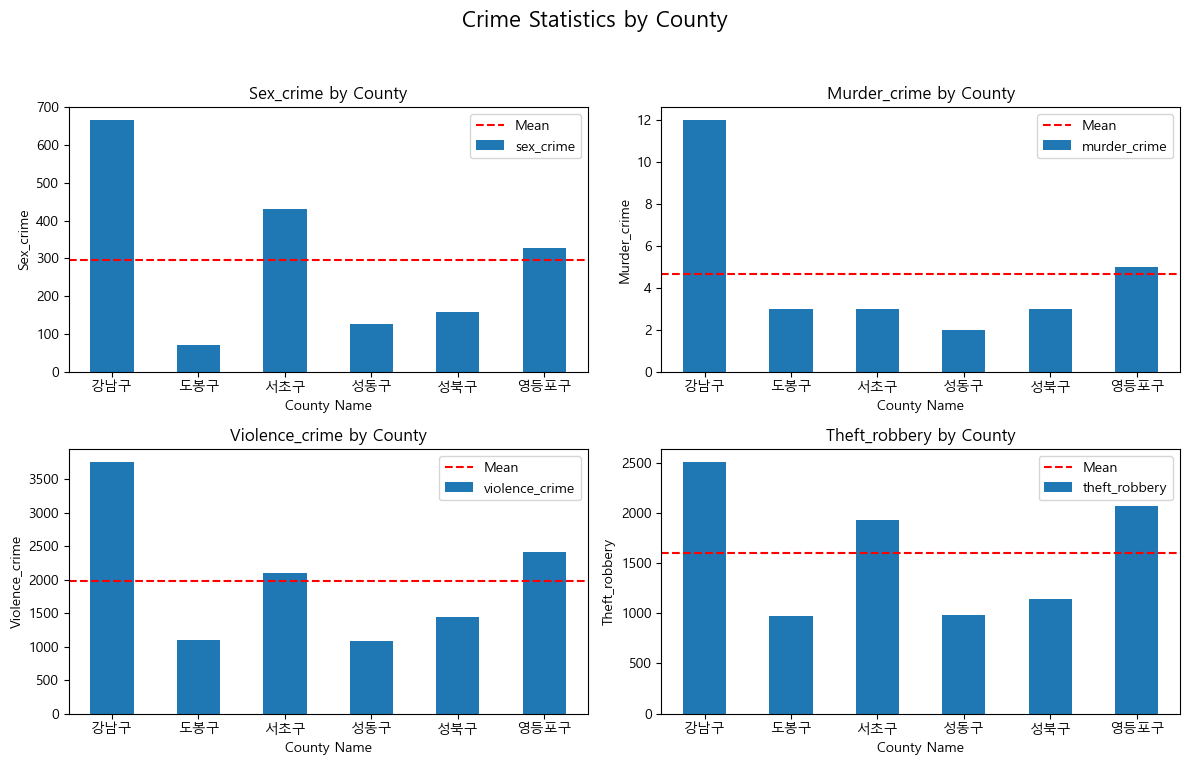

In [108]:
crime_types = ["sex_crime", "murder_crime", "violence_crime", "theft_robbery"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 인구 대비 범죄 발생 건수 비교 

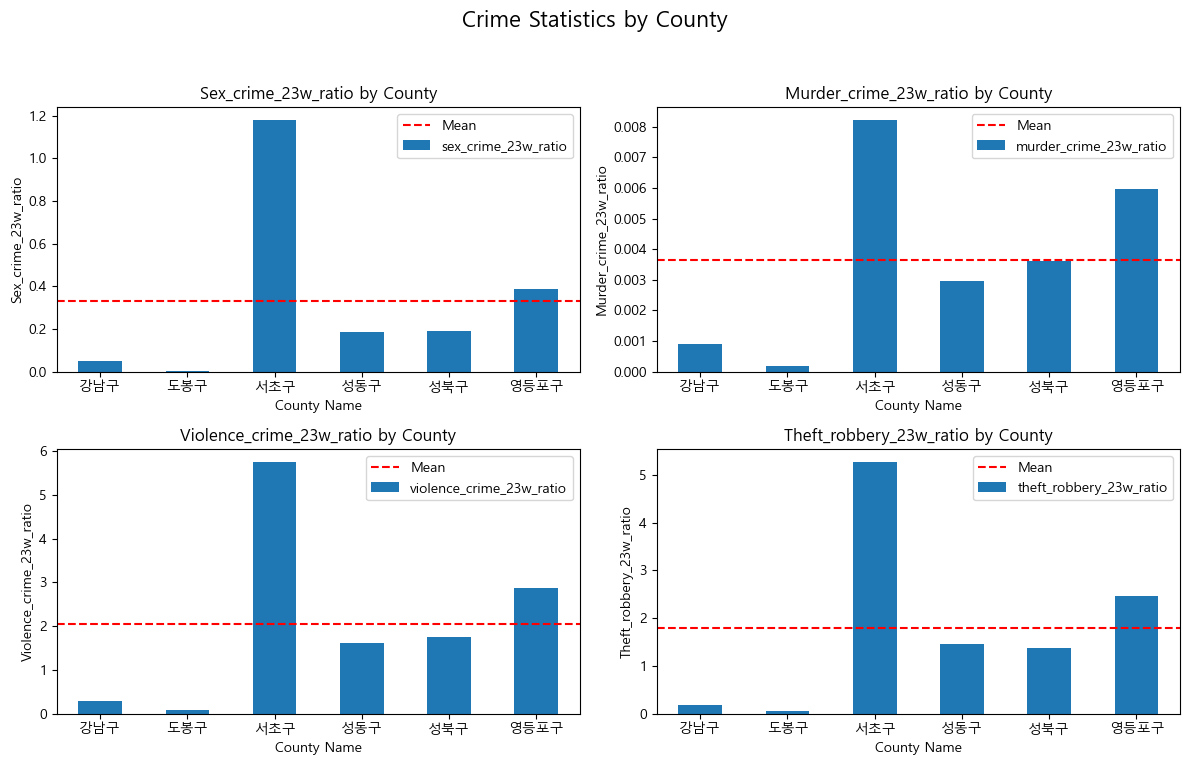

In [45]:
crime_types = ["sex_crime_23w_ratio", "murder_crime_23w_ratio", "violence_crime_23w_ratio", "theft_robbery_23w_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 유흥주점 X 인구 대비 safe, danger - 1인 가구 대비 범죄 발생 건수 비교 

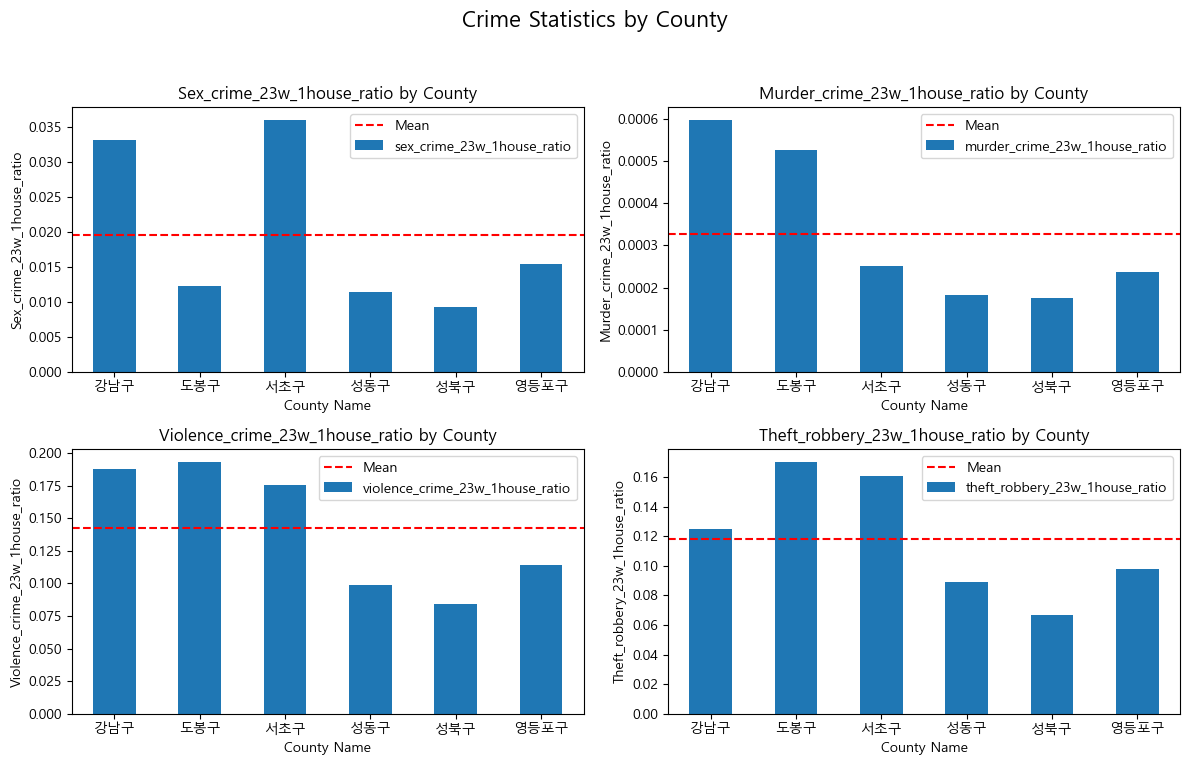

In [47]:
crime_types = ["sex_crime_23w_1house_ratio", "murder_crime_23w_1house_ratio", "violence_crime_23w_1house_ratio", "theft_robbery_23w_1house_ratio"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Crime Statistics by County', fontsize=16)

for i, crime_type in enumerate(crime_types):
    row, col = divmod(i, 2)
    
    ax = crime_club_sd.plot(kind='bar', x='county_name', y=crime_type, legend=True, rot=0, ax=axes[row, col])
    
    mean_value = crime_club_sd[crime_type].mean()
    ax.axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')
    
    ax.set_xlabel('County Name')
    ax.set_ylabel(f'{crime_type.capitalize()}')
    ax.set_title(f'{crime_type.capitalize()} by County')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 유흥주점 동으로 살펴보기

In [162]:
df= pd.read_csv("./data/safety/club_town.csv")
df.head()

,name,address,id,type,county_name,town_name,city_name,data_type
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점
1,왓따7080,서울특별시 은평구 구산동 321-98 지하1층,3110000,단란주점,은평구,구산동,서울,유흥주점
2,서담주점,서울특별시 구로구 구로동 153-3,3160000,단란주점,구로구,구로동,서울,유흥주점
3,유토피아,서울특별시 중랑구 묵동 245-1,3060000,단란주점,중랑구,묵동,서울,유흥주점
4,테크노,서울특별시 서대문구 홍제동 173-2,3120000,단란주점,서대문구,홍제동,서울,유흥주점


In [164]:
df['town_club_cnt'] = df.groupby('town_name')['name'].transform('count')
df.head()

,name,address,id,type,county_name,town_name,city_name,data_type,town_club_cnt
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점,178
1,왓따7080,서울특별시 은평구 구산동 321-98 지하1층,3110000,단란주점,은평구,구산동,서울,유흥주점,1
2,서담주점,서울특별시 구로구 구로동 153-3,3160000,단란주점,구로구,구로동,서울,유흥주점,42
3,유토피아,서울특별시 중랑구 묵동 245-1,3060000,단란주점,중랑구,묵동,서울,유흥주점,27
4,테크노,서울특별시 서대문구 홍제동 173-2,3120000,단란주점,서대문구,홍제동,서울,유흥주점,12


In [138]:
county_df = df[df['county_name'] == '성동구']
town_counts = county_df.groupby('town_name').size().reset_index(name='club_count')

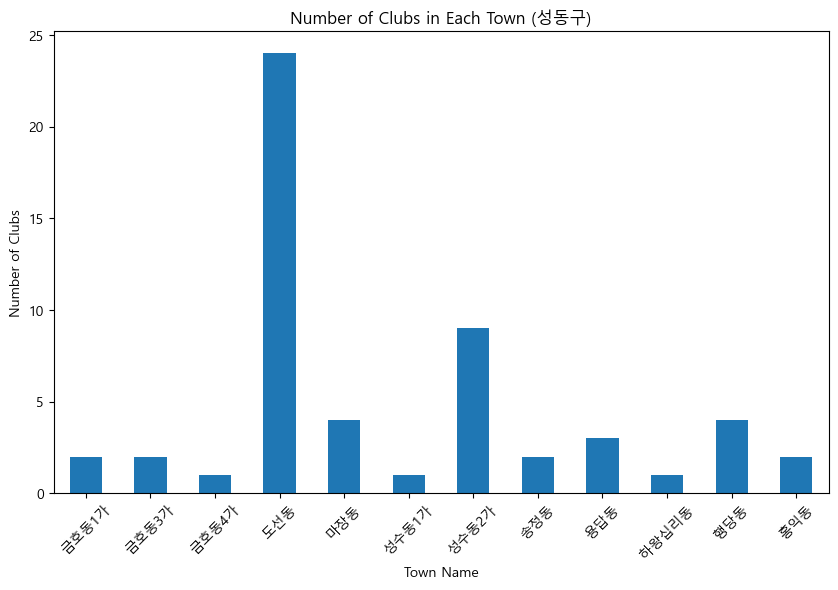

In [136]:
town_counts.plot(kind='bar', x='town_name', y='club_count', legend=False, rot=45, figsize=(10, 6))
plt.xlabel('Town Name')
plt.ylabel('Number of Clubs')
plt.title('Number of Clubs in Each Town (성동구)')

plt.show()

In [13]:
df = pd.read_csv("./data/safety/club_pub_county.csv")
#pop_t = pd.read_csv("./data/safety/pop_by.csv")
df

,Unnamed: 0,county_name,club_cnt,club_2030women_ratio(만 명당),club_2030w_h1_ratio(100가구 당)
0,0,강남구,350,44.897697,1.745549
1,1,강동구,176,27.537865,1.375645
2,2,강북구,146,40.161747,1.679899
3,3,강서구,282,30.828432,1.025194
4,4,관악구,244,25.891341,0.537800
5,5,광진구,82,13.920011,0.396902
6,6,구로구,104,18.481332,0.812373
7,7,금천구,107,30.441833,0.946400
8,8,노원구,57,9.067048,0.589818
9,9,도봉구,62,16.748609,1.090014


In [195]:
merged_df = pd.merge(df, pop_t, on='town_name')
merged_df

,name,address,id,type,county_name_x,town_name,city_name,data_type,town_club_cnt,county_name_y,women_2030
0,판도라,서울특별시 관악구 신림동 530-31 상진,3200000,단란주점,관악구,신림동,서울,유흥주점,178,관악구,44533
1,남강,서울특별시 관악구 신림동 499-50,3200000,단란주점,관악구,신림동,서울,유흥주점,178,관악구,44533
2,스위트 데빌스,서울특별시 관악구 신림동 1431-41,3200000,단란주점,관악구,신림동,서울,유흥주점,178,관악구,44533
3,모이자,서울특별시 관악구 신림동 527-3,3200000,단란주점,관악구,신림동,서울,유흥주점,178,관악구,44533
4,플로우서울(FLOW),서울특별시 관악구 신림동 1640-28,3200000,단란주점,관악구,신림동,서울,유흥주점,178,관악구,44533
...,...,...,...,...,...,...,...,...,...,...,...
3730,블루(Blue),서울특별시 영등포구 당산동5가 33-9번지 지하1층,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,영등포구,2539
3731,도도,서울특별시 영등포구 당산동5가 33-8 대영빌딩,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,영등포구,2539
3732,궁전노래바,서울특별시 영등포구 당산동5가 32-1,3180000,룸살롱,영등포구,당산동5가,서울,유흥주점,3,영등포구,2539
3733,팡팡,서울특별시 영등포구 문래동1가 58-15번지,3180000,룸살롱,영등포구,문래동1가,서울,유흥주점,1,영등포구,28


## 1인 가구수

#### 전체 & 2030 - 1인 가구 순위

In [200]:
h1_ratio.head()

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당)
0,강남구,77955,20051,2.572125
1,강동구,63912,12794,2.001815
2,강북구,36353,8691,2.390724
3,강서구,91474,27507,3.007084
4,관악구,94240,45370,4.814304


In [201]:
h1 = h1_ratio

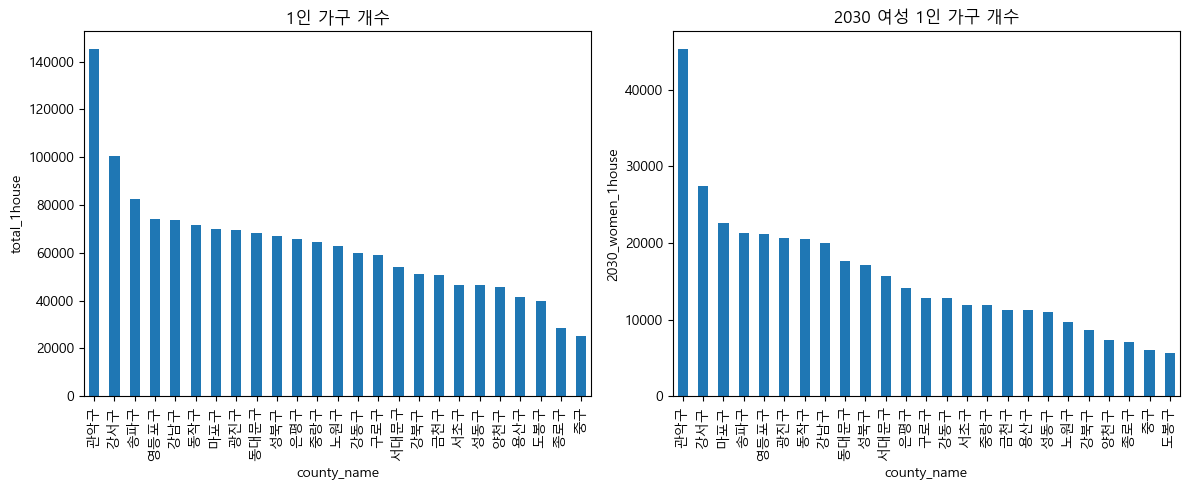

In [102]:
data = h1.sort_values(by='h1_total', ascending=False)
data_01 = h1.sort_values(by='h1_women_2030', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

data.plot(kind='bar', x='county_name', y='h1_total', ax=axes[0], legend=False, )
axes[0].set_title('1인 가구 개수')
axes[0].set_ylabel('total_1house')

data_01.plot(kind='bar', x='county_name', y='h1_women_2030', ax=axes[1], legend=False, )
axes[1].set_title('2030 여성 1인 가구 개수')
axes[1].set_ylabel('2030_women_1house')


plt.tight_layout()
plt.show()

<Axes: ylabel='h1_women_2030'>

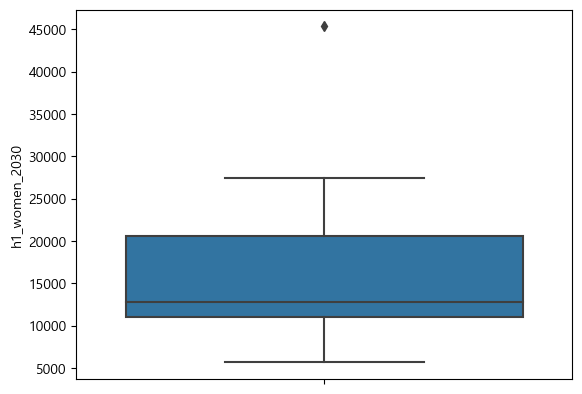

In [444]:
sns.boxplot(data=h1, y='h1_women_2030')

#### 2030 여성 인구 수 대비 2030_1인 가구 & 여성 2030_1인 가구 수 비율 

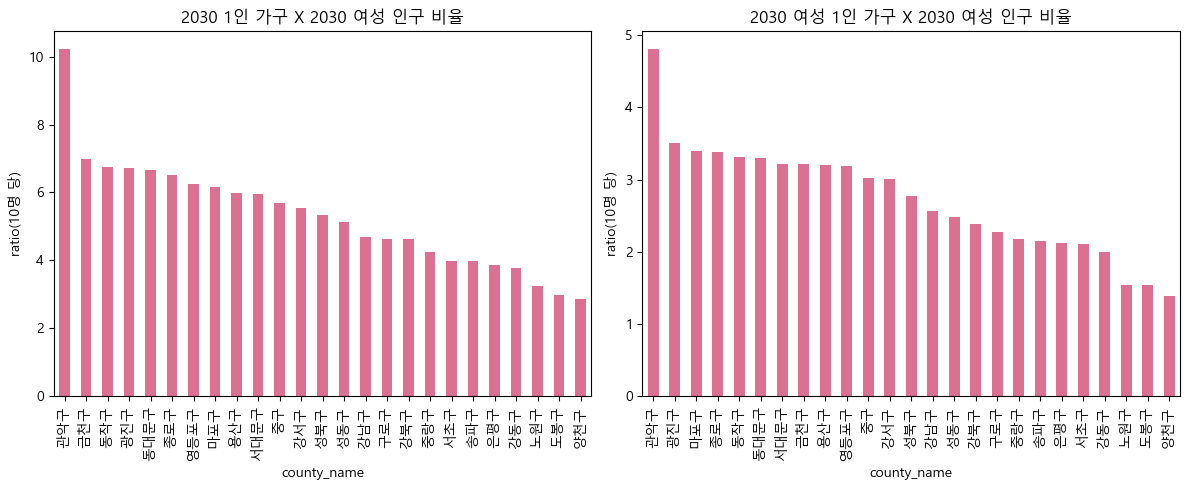

In [446]:
pop = h1.sort_values(by='23_h1_23women_ratio(10명당)', ascending=False)
women = h1.sort_values(by='23w_h1_23women_ratio(10명당)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

pop.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('2030 1인 가구 X 2030 여성 인구 비율')
axes[0].set_ylabel('ratio(10명 당)')

women.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('2030 여성 1인 가구 X 2030 여성 인구 비율')
axes[1].set_ylabel('ratio(10명 당)')

plt.tight_layout()
plt.show()

<Axes: ylabel='23w_h1_23women_ratio(10명당)'>

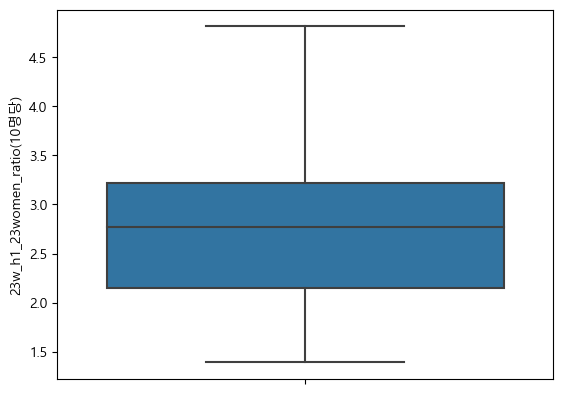

In [449]:
sns.boxplot(data=h1, y='23w_h1_23women_ratio(10명당)')

In [103]:
unsafe = h1[(h1["county_name"] == "강남구") | (h1["county_name"] == "서초구") | (h1["county_name"] == "영등포구")]
unsafe

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
0,강남구,77955,20051,2.572125,36502,4.682445,73579
14,서초구,56664,11947,2.108393,22608,3.989835,46745
19,영등포구,66291,21115,3.185199,41342,6.236442,73962


In [104]:
safe = h1[(h1["county_name"] == "도봉구") | (h1["county_name"] == "성동구") | (h1["county_name"] == "성북구")]
safe

,county_name,2030_women,h1_women_2030,23w_h1_23women_ratio(10명당),h1_2030,23_h1_23women_ratio(10명당),h1_total
9,도봉구,37018,5688,1.536550,11076,2.992058,39744
15,성동구,44378,11003,2.479382,22783,5.133850,46548
16,성북구,62017,17176,2.769563,33133,5.342567,67222


#### (not safe vs safe) 2030 1인 가구 X 2030 여성 인구 비율

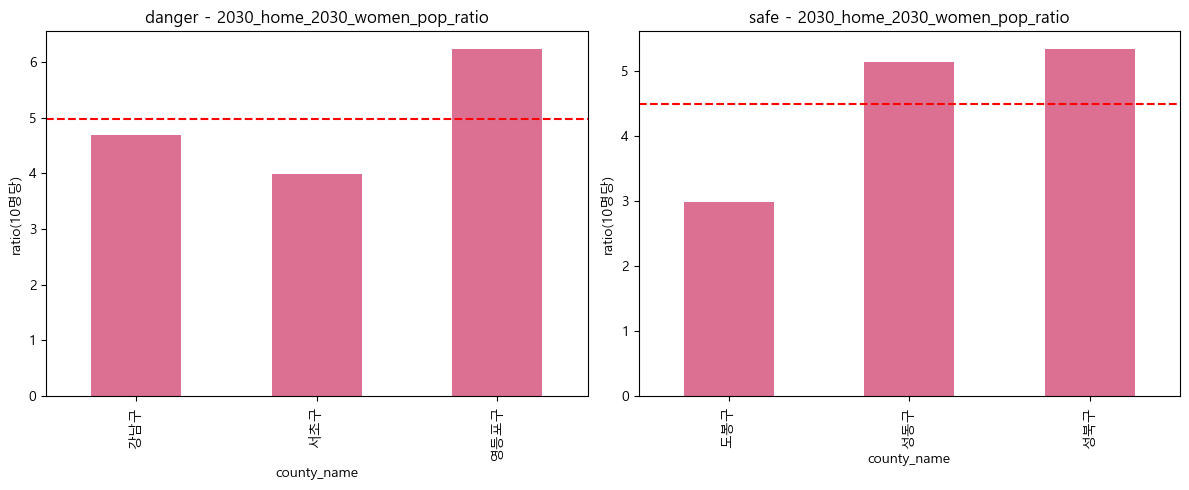

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - 2030_home_2030_women_pop_ratio')
axes[0].set_ylabel('ratio(10명당)')

mean_value = unsafe['23_h1_23women_ratio(10명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='23_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - 2030_home_2030_women_pop_ratio')
axes[1].set_ylabel('ratio(10명당)')

mean_value = safe['23_h1_23women_ratio(10명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

#### (not safe vs safe) 2030 여성 1인 가구 X 2030 여성 인구 비율

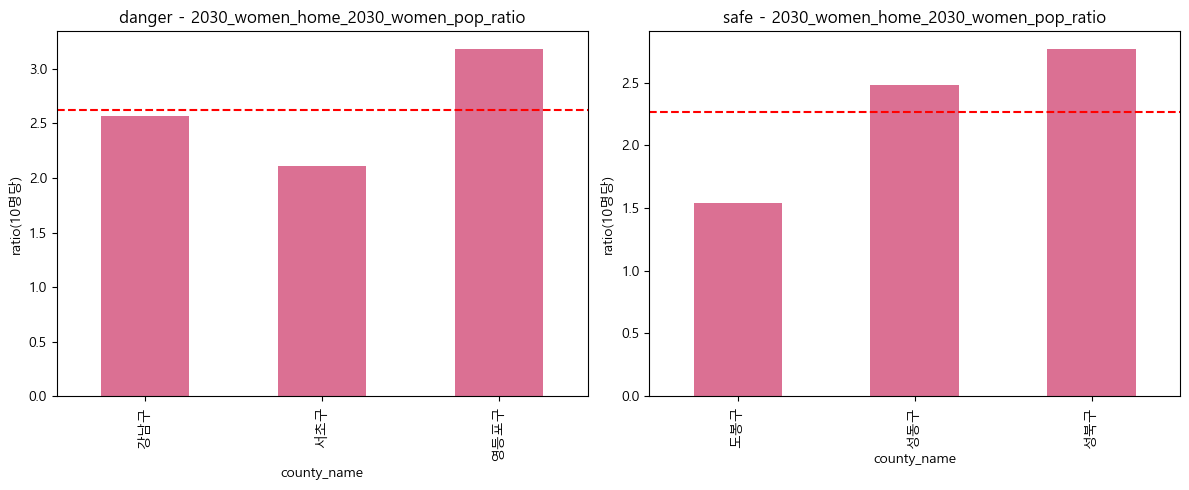

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[0], legend=False, color='palevioletred')
axes[0].set_title('danger - 2030_women_home_2030_women_pop_ratio')
axes[0].set_ylabel('ratio(10명당)')

mean_value = unsafe['23w_h1_23women_ratio(10명당)'].mean()
axes[0].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

safe.plot(kind='bar', x='county_name', y='23w_h1_23women_ratio(10명당)', ax=axes[1], legend=False, color='palevioletred')
axes[1].set_title('safe - 2030_women_home_2030_women_pop_ratio')
axes[1].set_ylabel('ratio(10명당)')

mean_value = safe['23w_h1_23women_ratio(10명당)'].mean()
axes[1].axhline(y=mean_value, color='red', linestyle='dashed', label='Mean')

plt.tight_layout()
plt.show()

### 1인 가구 ttest 진행

In [333]:
unsafe_t = unsafe[["county_name", "23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
unsafe_t["level"] = "danger"
unsafe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\3348061048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsafe_t["level"] = "danger"


,county_name,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
0,강남구,4.682445,2.572125,danger
14,서초구,3.989835,2.108393,danger
19,영등포구,6.236442,3.185199,danger


In [335]:
safe_t = safe[["county_name", "23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
safe_t["level"] = "safe"
safe_t

C:\Users\82108\AppData\Local\Temp\ipykernel_2368\3407905406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe_t["level"] = "safe"


,county_name,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
9,도봉구,2.992058,1.536550,safe
15,성동구,5.133850,2.479382,safe
16,성북구,5.342567,2.769563,safe


In [336]:
ttest = pd.concat([safe_t, unsafe_t], axis=0)

In [338]:
ttest

,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당),level
9,2.992058,1.536550,safe
15,5.133850,2.479382,safe
16,5.342567,2.769563,safe
0,4.682445,2.572125,danger
14,3.989835,2.108393,danger
19,6.236442,3.185199,danger


In [340]:
ttest.groupby("level")[["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]].mean()

,23_h1_23women_ratio(10명당),23w_h1_23women_ratio(10명당)
level,,
danger,4.969574,2.621906
safe,4.489492,2.261832


#### H0 : danger 지역 평균과 safe 지역 평균에 차이가 없다.
#### H1 : danger 지역 평균과 safe 지역 평균에 차이가 있다.

In [341]:
from scipy import stats

test_names = ["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]

danger = ttest[ttest['level'] == 'danger'][["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]
safe = ttest[ttest['level'] == 'safe'][["23_h1_23women_ratio(10명당)", "23w_h1_23women_ratio(10명당)"]]

for test_name in test_names:
    _, p_value_levene = stats.levene(danger[test_name], safe[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

23_h1_23women_ratio(10명당) p-value: 0.9682041738245892, 등분산 가정 만족
23w_h1_23women_ratio(10명당) p-value: 0.8837888554892804, 등분산 가정 만족


In [342]:
# 양측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="two-sided",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.65708744 0.49953036]
귀무 가설 기각: [False False]


In [343]:
# 단측검정
t_statistic, p_value = stats.ttest_ind(
    a=safe,
    b=danger,
    alternative="less",    # a < b
    equal_var= True,
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")


p-value: [0.32854372 0.24976518]
귀무 가설 기각: [False False]


## 인구 (2030 여성) 대비 2030_1인 가구 수 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균은 같다.

-> danger 지역이라고 인구 2030_1인 가구 수 (2030 여성 인구 수 대비)가 많은 것이 아니다.

## 인구 (2030 여성) 대비 2030_여성_1인 가구 수 비율
양측 + 단측 검정 둘 다 귀무가설 채택 

-> danger 지역의 평균과 safe 지역의 평균은 같다.

-> danger 지역이라고 인구 2030_여성_1인 가구 수 (2030 여성 인구 수 대비)가 많은 것이 아니다.

## 지역내총생산

In [456]:
gdp.head()

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
0,서울시,종로구,35719537,7.6,238599
1,서울시,중구,61342710,13.0,481395
2,서울시,용산구,13294640,2.8,58918
3,서울시,성동구,13999893,3.0,48682
4,서울시,광진구,6554954,1.4,18732


#### 자치구 별 - 지역내총생산 & 1인당 순위

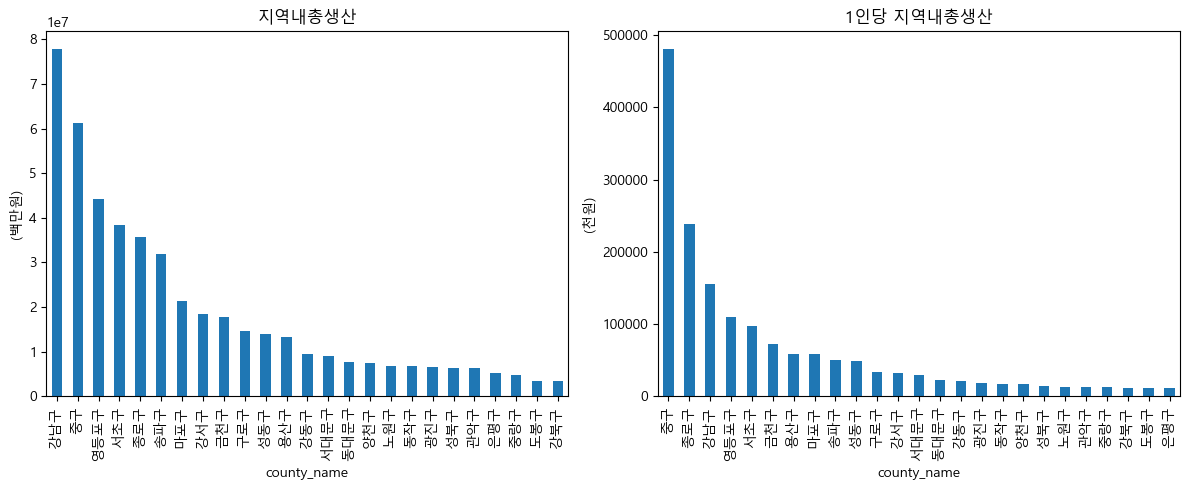

In [457]:
total = gdp.sort_values(by='지역내총생산(백만원)', ascending=False)
per_one = gdp.sort_values(by='1인당 지역내총생산(천원)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

total.plot(kind='bar', x='county_name', y='지역내총생산(백만원)', ax=axes[0], legend=False)
axes[0].set_title('지역내총생산')
axes[0].set_ylabel('(백만원)')

per_one.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[1], legend=False)
axes[1].set_title('1인당 지역내총생산')
axes[1].set_ylabel('(천원)')

plt.tight_layout()
plt.show()

In [458]:
unsafe = per_one[(per_one["county_name"] == "강남구") | (per_one["county_name"] == "서초구") | (per_one["county_name"] == "영등포구")]
unsafe

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
22,서울시,강남구,77924019,16.5,155358
18,서울시,영등포구,44265877,9.4,109100
21,서울시,서초구,38335706,8.1,96783


In [459]:
safe = per_one[(per_one["county_name"] == "도봉구") | (per_one["county_name"] == "성동구") | (per_one["county_name"] == "성북구")]
safe

,city,county_name,지역내총생산(백만원),구성비(%),1인당 지역내총생산(천원)
3,서울시,성동구,13999893,3.0,48682
7,서울시,성북구,6371894,1.3,14608
9,서울시,도봉구,3490683,0.7,11233


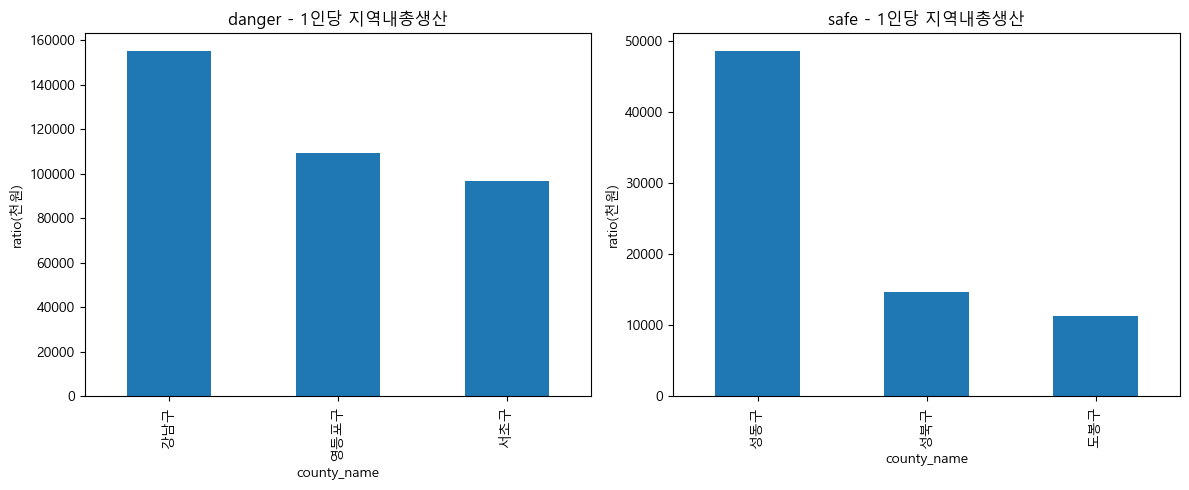

In [463]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

unsafe.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[0], legend=False,)
axes[0].set_title('danger - 1인당 지역내총생산')
axes[0].set_ylabel('ratio(천원)')

safe.plot(kind='bar', x='county_name', y='1인당 지역내총생산(천원)', ax=axes[1], legend=False, )
axes[1].set_title('safe - 1인당 지역내총생산')
axes[1].set_ylabel('ratio(천원)')

plt.tight_layout()
plt.show()

<Axes: ylabel='1인당 지역내총생산(천원)'>

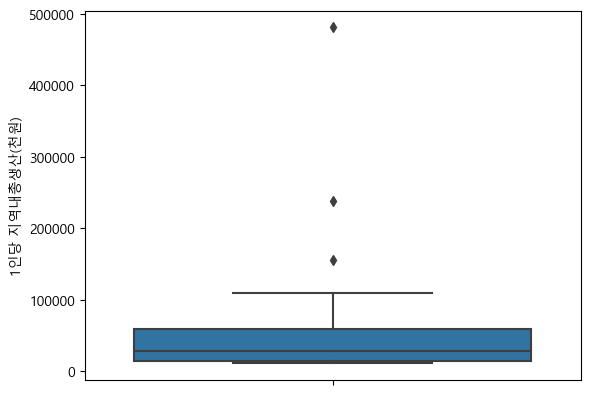

In [464]:
sns.boxplot(data=per_one, y='1인당 지역내총생산(천원)')

#### 범죄율과 상관관계 보기

In [45]:
df = df[["total_crime", "crime_pop_ratio", "h1_2030", "2030_h1_pop_ratio", "club_cnt", "club_pop_ratio", "1인당 지역내총생산(천원)", "지역내총생산(백만원)"]]
df

,total_crime,crime_pop_ratio,h1_2030,2030_h1_pop_ratio,club_cnt,club_pop_ratio,1인당 지역내총생산(천원),지역내총생산(백만원)
0,6947,0.012650,36502,6.646951,350,6.373440,155358,77924019
1,3711,0.008078,24157,5.258506,176,3.831176,20717,9364063
2,2832,0.009851,16815,5.848899,146,5.078438,11754,3462961
3,4663,0.008289,50790,9.028531,282,5.012888,32709,18347568
4,4879,0.010125,96439,20.013406,244,5.063585,12792,6347562
5,3619,0.010792,39617,11.814156,82,2.445316,18732,6554954
6,3857,0.009831,26090,6.650336,104,2.650958,34144,14663398
7,2577,0.011330,24592,10.811714,107,4.704186,71770,17801015
8,3896,0.007835,20316,4.085778,57,1.146335,13331,6728358
9,2141,0.006980,11076,3.611088,62,2.021374,11233,3490683


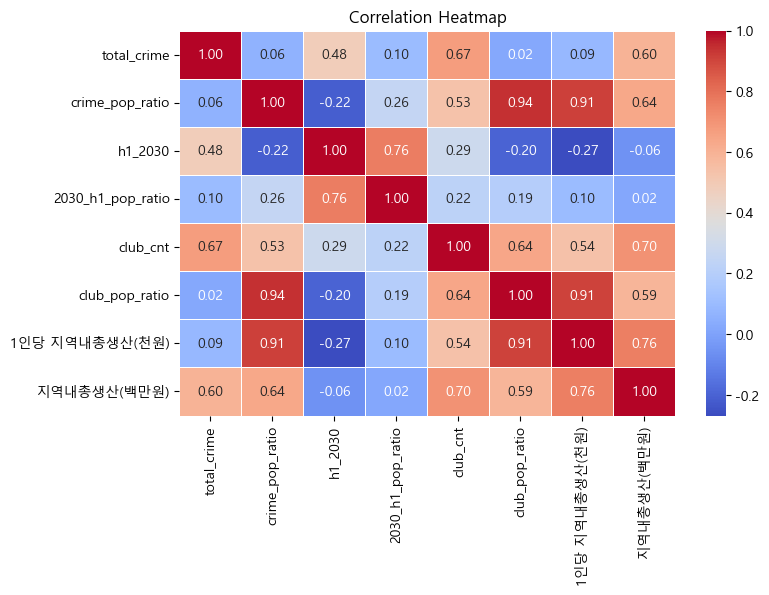

In [47]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## 성동구,강서구 인구

In [3]:
h1 = pd.read_csv("./data/safety/one_house.csv")

Text(0.5, 0, '강서구')

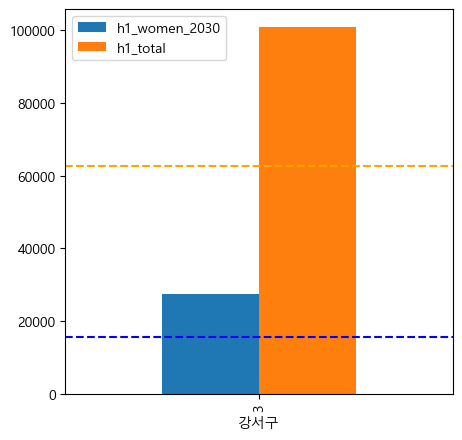

In [4]:
data = h1[h1["county_name"] == "강서구"]
data = data[["h1_women_2030", "h1_total"]]

data.plot(kind="bar",figsize=(5,5))

mean_value = h1['h1_women_2030'].mean()
plt.axhline(y=mean_value, color='blue', linestyle='dashed', label='h1w_Mean')

mean_value1 = h1['h1_total'].mean()
plt.axhline(y=mean_value1, color='orange', linestyle='dashed', label='h1_Mean')

plt.xlabel('강서구')

### 성동구 강서구 동 별로 보기

In [5]:
crime = pd.read_csv("./data/safety/concat_data_safe.csv")
club = pd.read_csv("./data/safety/club_town.csv")
pop = pd.read_csv("./data/safety/pop_by_dong.csv")

In [7]:
pop = pop[["county_name", "town_name", "pop_total","women_2030"]]
club = club[["county_name", "town_name", "name"]]

Text(0.5, 0, '하왕십리동')

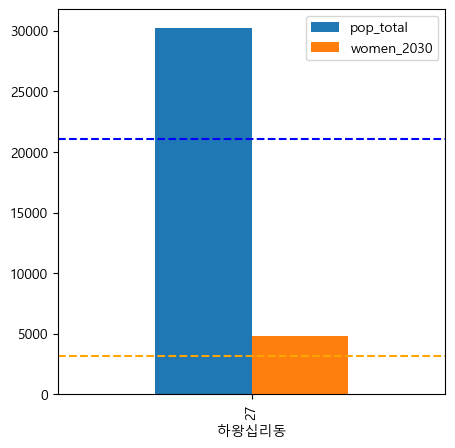

In [8]:
pop_d = pop[(pop["county_name"] == "성동구") & (pop["town_name"] == "하왕십리동")]

pop_d.plot(kind="bar",figsize=(5,5))

mean_value = pop['pop_total'].mean()
plt.axhline(y=mean_value, color='blue', linestyle='dashed', label='Mean')

mean_value1 = pop['women_2030'].mean()
plt.axhline(y=mean_value1, color='orange', linestyle='dashed', label='Mean1')

plt.xlabel('하왕십리동')

In [13]:
resident = pd.read_csv("./data/safety/pop_age_town.csv")
resident

,시도명,시군구명,읍면동명,total,19이하,2030,4060,70100,101이상
0,서울특별시,종로구,청운동,2274,427,521,1034,291,1
1,서울특별시,종로구,신교동,1341,203,334,655,149,0
2,서울특별시,종로구,궁정동,217,45,53,109,9,1
3,서울특별시,종로구,효자동,568,76,157,266,69,0
4,서울특별시,종로구,창성동,404,49,95,196,63,1
...,...,...,...,...,...,...,...,...,...
450,서울특별시,강동구,둔촌동,24349,3379,6822,11345,2801,2
451,서울특별시,강동구,암사동,65746,9565,17300,31077,7796,8
452,서울특별시,강동구,성내동,65323,7211,20398,29794,7911,9
453,서울특별시,강동구,천호동,84813,7876,27090,39027,10808,12


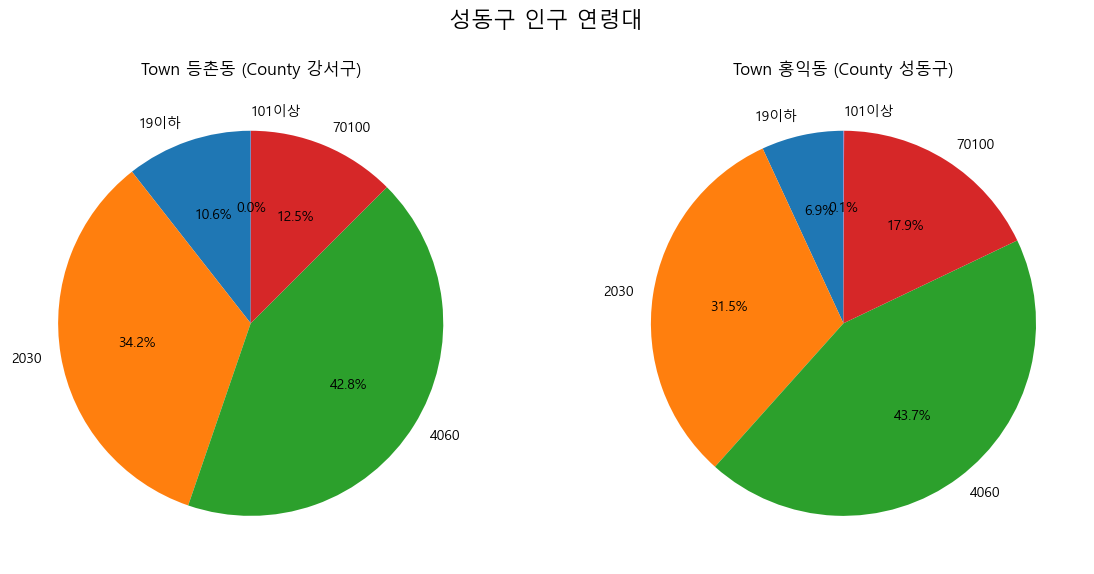

In [14]:
selected_towns = ['등촌동', '홍익동']
selected_population = resident[resident['읍면동명'].isin(selected_towns)]

# Plotting pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('성동구 인구 연령대', fontsize=16)

for i, town in enumerate(selected_towns):
    population_values = selected_population[selected_population['읍면동명'] == town][['19이하','2030', '4060', '70100', '101이상']].iloc[0]
    axes[i].pie(population_values, labels=population_values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Town {town} (County {selected_population[selected_population["읍면동명"] == town]["시군구명"].values[0]})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
df = pd.read_csv("./data/safety/safe_danger_town.csv")
df

,town,bus,metro,lib,park,club,cctv,lights,house,police
0,등촌동,20,0,2,15,6,221,826,4,1
1,공항동,39,1,0,5,9,105,716,2,0
2,염창동,13,0,1,6,5,102,415,0,1
3,홍익동,1,0,0,1,2,29,0,0,1
4,도선동,2,0,0,0,24,23,17,3,0
5,상왕십리동,3,0,1,2,0,5,0,0,0
6,하왕십리동,6,1,0,8,1,75,52,1,0


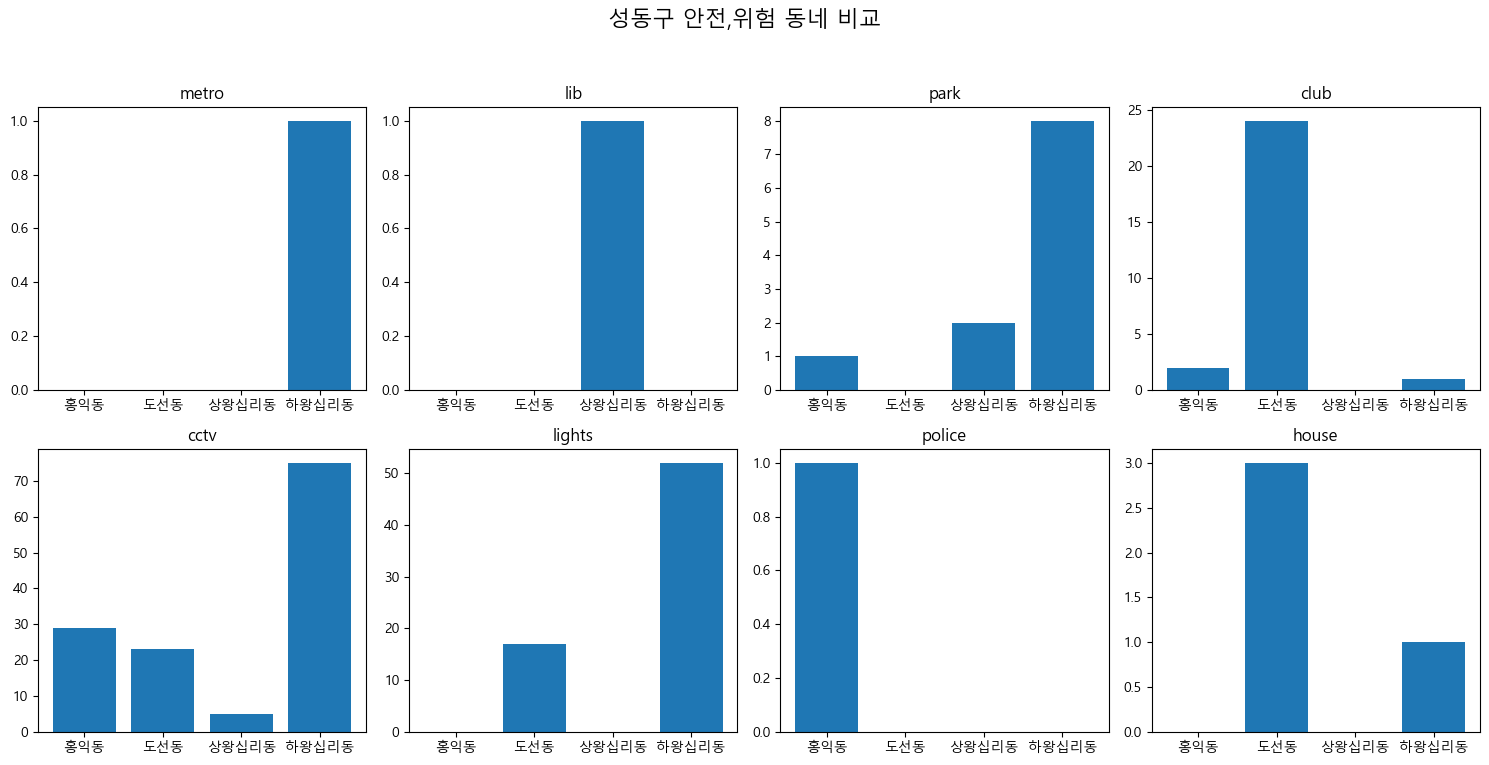

In [11]:
selected_towns = ['홍익동', '도선동', '상왕십리동', '하왕십리동']
selected_df = df[df['town'].isin(selected_towns)]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('성동구 안전,위험 동네 비교', fontsize=16)

columns_to_plot = ['metro', 'lib', 'park', 'club', 'cctv', 'lights', 'police', 'house']

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 4)
    axes[row, col].bar(selected_df['town'], selected_df[column])
    axes[row, col].set_title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

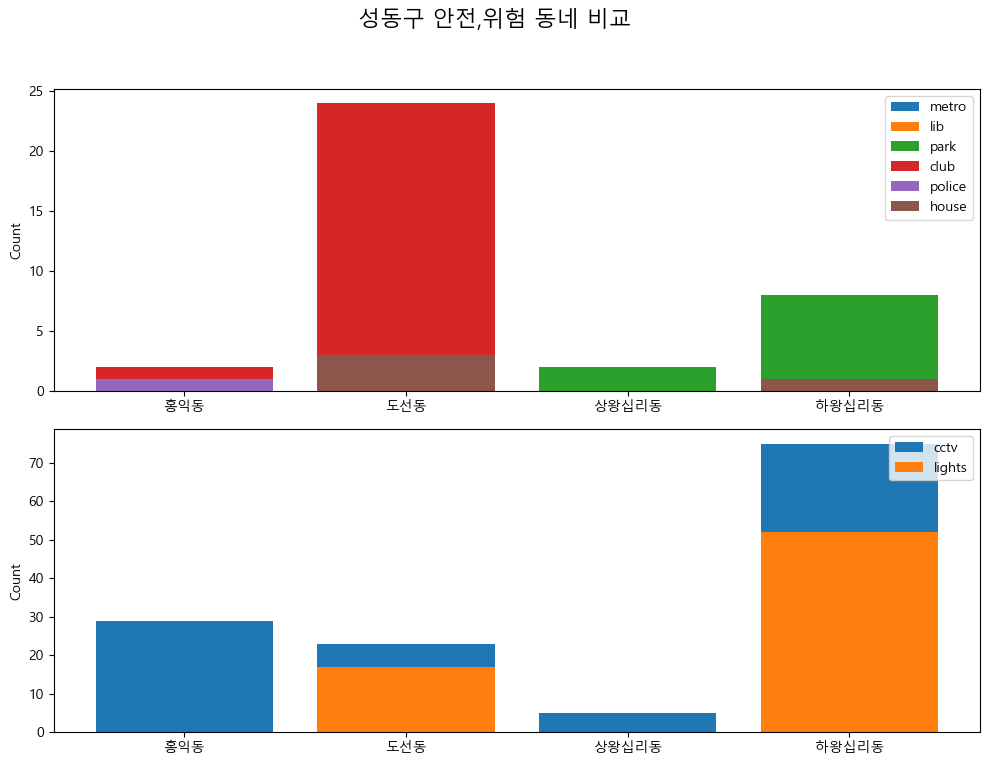

In [12]:
selected_towns = ['홍익동', '도선동', '상왕십리동', '하왕십리동']
selected_df = df[df['town'].isin(selected_towns)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
fig.suptitle('성동구 안전,위험 동네 비교', fontsize=16)

bottom = [0] * len(selected_towns)

for column in ['metro', 'lib', 'park', 'club', 'police', 'house']:
    axes[0].bar(selected_df['town'], selected_df[column],  label=column)
    bottom += selected_df[column]

axes[0].legend(loc='upper right')
axes[0].set_ylabel('Count')

for column in ['cctv','lights']:
    axes[1].bar(selected_df['town'], selected_df[column], label=column)
    bottom += selected_df[column]

axes[1].legend(loc='upper right')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()